## Практическое занятие 5
## Математический анализ
## Численное решение нелинейных уравнений: nsolve
https://docs.sympy.org/latest/modules/solvers/solvers.html?highlight=nsolve#sympy.solvers.solvers.nsolve

#### Уравнение в форме $f(x)=0$

In [1]:
import numpy as np
import sympy
from sympy import nsolve
import matplotlib.pyplot as plt
%matplotlib inline

### Задача 1
Решить уравнение $𝑥^4−e^x=0$ при $-2 \le x \le 2$, построить график левой части, отметить точки пересечения с осью ОХ.

-0.815553418808961
1.42961182472556


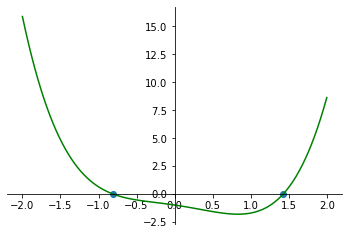

In [39]:
import numpy as np
import sympy
from sympy import nsolve, exp
import matplotlib.pyplot as plt
%matplotlib inline

def f(x, lib='sympy'):
    if lib == 'sympy':
        return pow(x,4) - exp(x)
    if lib == 'numpy':
        return pow(x,4) - np.exp(x)
    return 'error'


X = np.linspace(-2, 2, 100)
plt.plot(X, f(X, 'numpy'), color= 'green')
ax = plt.gca()

ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')
ax.spines['left'].set_position(('data', 0)) 
ax.spines['bottom'].set_position(('data', 0))

print(sympy.nsolve(f(x, 'sympy'), x, -1)) # левый корень
print(sympy.nsolve(f(x, 'sympy'), x, 1)) # правый корень


roots = [sympy.nsolve(sympy.Eq(f(x, lib='sympy'),0), x, i) for i in [-1, 1]]
y_coord = [f(root, lib='sympy') for root in roots]
ax.scatter(roots, y_coord)

### Задача 2.
Решить уравнение $\sin^2(2x)=\ln x$ при $0< x \le 3$. Построить графики левой и правой части, отметить точку пересечения графиков.

<ipython-input-128-ea49d516c3a0>:11: RuntimeWarning: divide by zero encountered in log
  return pow(np.sin(2*x),2) - np.log(x)


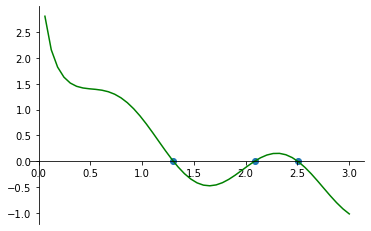

In [128]:
import numpy as np
import sympy
from sympy import nsolve, exp
import matplotlib.pyplot as plt
%matplotlib inline

def f(x, lib='sympy'):
    if lib == 'sympy':
        return pow(sympy.sin(2*x), 2) - sympy.log(x)
    if lib == 'numpy':
        return pow(np.sin(2*x),2) - np.log(x)
    return 'error'


X = np.linspace(0,3)
ax = plt.gca() # get current axes - получить текущую систему координат
ax.plot(X, f(X, lib='numpy'), color='green')

roots = [sympy.nsolve(sympy.Eq(f(x, lib='sympy'),0), x, i) for i in [1, 2,2.5]]
y_coord = [f(float(root), lib='numpy') for root in roots]
ax.scatter(roots, y_coord)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))


### Задача 3.
Решить уравнение $\sin^2(2x^2-7x+6)=3/4$ на $[3, 4]$. Построить графики левой и правой части, отметить точки пересечения графиков.

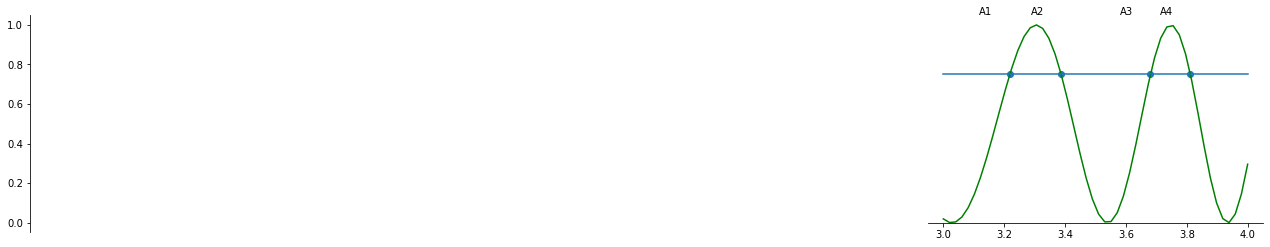

In [97]:
import numpy as np
import sympy
from sympy import nsolve, exp, Symbol
import matplotlib.pyplot as plt
%matplotlib inline

def f(x, lib='sympy'):
    if lib == 'sympy':
        return pow(sympy.sin(2*(x**2) - 7*x + 6), 2)
    if lib == 'numpy':
        return pow(np.sin(2*(x**2) - 7*x + 6), 2)
    return 'error'

def g(x):
    return float(3/4)

X = np.linspace(3,4)
ax = plt.gca() # get current axes - получить текущую систему координат
ax.plot(X, f(X, lib='numpy'), color='green')
ax.plot(X, [g(X) for x in X])

roots = [sympy.nsolve(sympy.Eq(f(x, lib='sympy'),3/4), x, i) for i in [3,3.25,3.5,3.7]]
y_coord = [f(float(root), lib='numpy') for root in roots]
ax.scatter(roots, y_coord)

for i, x_coord in enumerate(roots): # Чтобы не писать много раз один длинный код, сделаем подписи в цик ле
    ax.annotate('A' + str(i + 1),
                xy=(x_coord, y_coord[i]), xycoords='data', # Координаты подписываемой точки
                xytext=(x_coord - 0.1, y_coord[i] + 0.3), textcoords='data' # Координаты текста подписи, смещены от точки
                )

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))


### Задача 4.
Решить уравнение ${\rm tg}^4(2x^2+1)-10=0$ на интервале $[0, 0.2]$ методом дихотомии. График строить не нужно.

In [125]:
import numpy as np
import sympy
from sympy import nsolve, exp, Symbol
import matplotlib.pyplot as plt
from sympy.abc import x
%matplotlib inline

roots = [sympy.nsolve(sympy.Eq(pow(sympy.tan(2*(x**2) +1), 4), 10), x,
interval, solver='bisect', verify=False) for interval in [[0, 0.1], [0.1, 0.2]]]
roots

[8.67361737988404e-20, 0.171066377483446]

### Задача 5.
Решить систему уравнений 
$$
\left\{\begin{matrix}
(x - 1)^2 + (y - 2)^2 + (z + 3)^2 = 25\\
x + y + z = 0\\
-2x + 3y - z = 7
\end{matrix}\right.
$$
начальное приближение (0, 0, 0).
Проверить подстановкой.

In [127]:
from sympy.abc import x,y,z
from sympy import nsolve, exp, Symbol, Eq
S =[Eq((x-1)**2 + (y-2)**2 + (z+3)**2, 25),
    Eq(x+y+z,0),
    Eq(-2*x+3*y-z,7)
    ]
sympy.nsolve(S, [x,y,z],(0,0,0))

Matrix([
[-2.08606699924184],
[ 1.22848325018954],
[0.857583749052298]])

### Индивидуальное задание
Построить графики функций $f(x)$ и $g(x)$, уточнить координаты точек пересечения, решая численно соответствующее уравнение. На  графике отметить и подписать буквами $А_1$, $A_2$, ... точки пересечения графиков.  

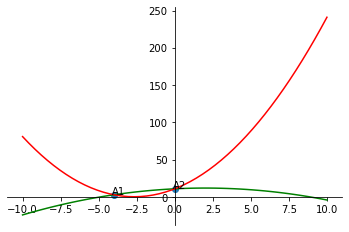

In [131]:
# 143


import numpy as np
import sympy
from sympy import nsolve, exp
import matplotlib.pyplot as plt
%matplotlib inline

def f(x, lib='sympy'):
    if lib == 'sympy':
        return -pow(x, 2)/4 +x + 11
    if lib == 'numpy':
        return -pow(x, 2)/4 +x + 11
    return 'error'

def g(x, lib='sympy'):
    if lib == 'sympy':
        return 3*pow(x, 2)/2 +8*x + 11
    if lib == 'numpy':
        return 3*pow(x, 2)/2 +8*x + 11
    return 'error'

X = np.linspace(-10,10)
ax = plt.gca() # get current axes - получить текущую систему координат
ax.plot(X, f(X, lib='numpy'), color='green')
ax.plot(X, g(X, lib='numpy'), color='red')

roots = [sympy.nsolve(sympy.Eq(f(x, lib='sympy'),g(x, 'sympy')), x, i) for i in [-4, 0]]
y_coord = [f(float(root), lib='numpy') for root in roots]
ax.scatter(roots, y_coord)

for i, x_coord in enumerate(roots): # Чтобы не писать много раз один длинный код, сделаем подписи в цик ле
    ax.annotate('A' + str(i + 1),
                xy=(x_coord, y_coord[i]), xycoords='data', # Координаты подписываемой точки
                xytext=(x_coord - 0.1, y_coord[i] + 0.3), textcoords='data' # Координаты текста подписи, смещены от точки
                )

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
